In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%%capture
!pip install ftfy translate langdetect imbalanced-learn collections-extended rake_nltk googletrans


In [3]:
import sys
sys.path.insert(0,'/content/drive/My Drive/MyColabProjects/Capstone/NLP2/nlp_project')

In [4]:
# !pip install chart_studio
# !pip install wordcloud
# !pip install ftfy
# !pip install rake_nltk
# !pip install gensim 
# !pip install missingno
# !pip install googletrans
# !pip install langdetect
# !pip install imblearn
# !pip install collections2

# Standard Library
import pandas as pd
import numpy as np

from ftfy import *
import nltk
from rake_nltk import Rake

from utils.visualization import *
from utils.datapreprocessing import *

import missingno as msno
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 

# For Translation
from googletrans import Translator
from langdetect import detect

#For Upsampling
import imblearn
from collections import Counter
from matplotlib import pyplot
from numpy import where
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Import label encoder 
from sklearn import preprocessing 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Import Dependencies

import os
import re

import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

import keras

from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding

# For RNN Layer
from keras.models import Sequential
from keras.layers import Embedding, GRU, LSTM, Bidirectional
from keras.layers import Dense, Dropout, Activation, Input,  Flatten

# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# For CNN Layer
from keras.layers import Conv1D, MaxPooling1D

# For Text Summarization
from gensim.summarization import summarize

%tensorflow_version 1.x

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [5]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [6]:
filename= "/content/drive/My Drive/MyColabProjects/Capstone/NLP2/nlp_project/dataset/HarshaCharan_output.csv"
df = pd.read_csv(filename)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Short description                                            8500 non-null   object
 1   Description                                                  8500 non-null   object
 2   Caller                                                       8500 non-null   object
 3   Assignment group                                             8500 non-null   object
 4   Raked Short description                                      8500 non-null   object
 5   Raked Description                                            8500 non-null   object
 6   Iso_Description                                              8500 non-null   object
 7   Language_Description                                         8500 non-null   object
 8 

In [8]:
df2 = df[(df['PredictedGroup'].isna())]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8184 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Short description                                            8184 non-null   object
 1   Description                                                  8184 non-null   object
 2   Caller                                                       8184 non-null   object
 3   Assignment group                                             8184 non-null   object
 4   Raked Short description                                      8184 non-null   object
 5   Raked Description                                            8184 non-null   object
 6   Iso_Description                                              8184 non-null   object
 7   Language_Description                                         8184 non-null   object
 8 

In [10]:
df3 = pd.DataFrame()
df3['Translated_Description'] = df2['Translated_Description']
df3['Translated_Short description'] = df2['Translated_Short description']
df3['Assignment group'] = df2['Assignment group']

In [11]:
for des in df3['Translated_Description']:
    des = clean_text(des)
print("'Description' Cleaning is complete.")

'Description' Cleaning is complete.


In [12]:
for short_des in df3['Translated_Short description']:
    short_des = clean_text(short_des)
print("'Short description' cleaning is complete.")

'Short description' cleaning is complete.


In [13]:
df3.loc[ df3['Translated_Description'].apply(lambda x : len(x) > 150) ].shape

(2534, 3)

In [14]:
df3['Length of Translated_Description Before Summarization'] = df3['Translated_Description'].apply(lambda x: len(str(x).split()))

df3['Length of Translated_Short description Before Summarization'] = df3['Translated_Short description'].apply(lambda x: len(str(x).split()))

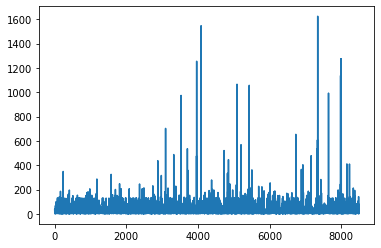

In [15]:
df3['Length of Translated_Description Before Summarization'].plot()

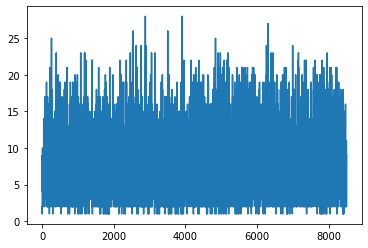

In [16]:
df3['Length of Translated_Short description Before Summarization'].plot()

In [17]:
df3['Summarized_Translated_Description'] = df3['Translated_Description'].apply(create_summarized_feature)

Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)


In [18]:
df3['Length of Translated_Description After Summarization'] = df3['Summarized_Translated_Description'].apply(lambda x: len(str(x).split()))

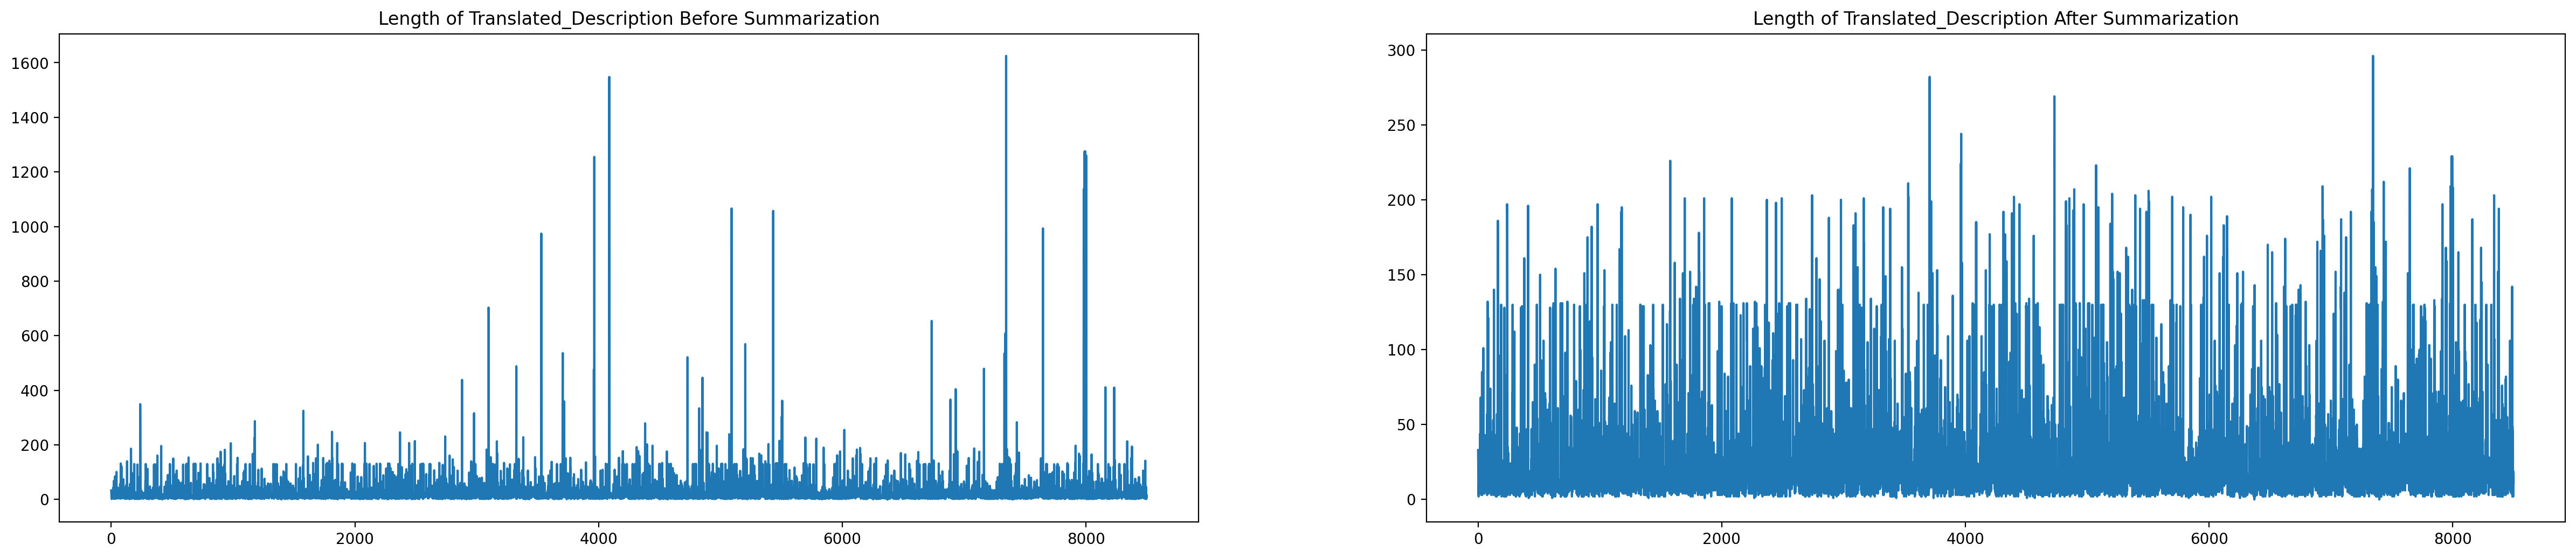

In [19]:
plt.figure(figsize=(30, 6), dpi=200)
plt.subplot(1, 2, 1)
df3['Length of Translated_Description Before Summarization'].plot()
plt.title('Length of Translated_Description Before Summarization')

plt.subplot(1, 2, 2)
df3['Length of Translated_Description After Summarization'].plot()
plt.title('Length of Translated_Description After Summarization')
plt.show()

In [20]:
df3.loc[ df3['Summarized_Translated_Description'].apply(lambda x : len(x.split()) > 150) ][['Length of Translated_Description After Summarization', 'Summarized_Translated_Description']]

,Length of Translated_Description After Summarization,Summarized_Translated_Description
162,186,"received from: emailaddress hello, till la..."
238,197,hi all we have a connectivity issue between e...
239,190,please complete all required questions below.\...
379,161,"received from: emailaddress hi it experts, ..."
410,196,Myhrt sthry retired as plant manager in usa. i...
...,...,...
8160,187,received from: emailaddress please release th...
8232,168,habe noch kein ticket erhalten ...\nmit freund...
8339,203,"hello team, could you please unlock account ..."
8371,152,from: microsoft on behalf of company inc. emai...


In [21]:
df3['Summarized_Translated_Short Description'] = df3['Translated_Short description'].apply(create_summarized_feature)

In [22]:
# Concatenate Short description and Description
df3['Complete_Description'] = df3['Summarized_Translated_Description'] + " " + df3['Summarized_Translated_Short Description']
df3.head(10)

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Summarized_Translated_Short Description,Complete_Description
0,-verified user details.(employee# & manager na...,login issue,GRP_0,33,2,-verified user details.(employee# & manager na...,33,login issue,-verified user details.(employee# & manager na...
1,"received from: emailaddress hello team, my...",outlook,GRP_0,25,1,"received from: emailaddress hello team, my...",25,outlook,"received from: emailaddress hello team, my..."
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0,11,5,received from: emailaddress hi i cannot lo...,11,cant log in to vpn,received from: emailaddress hi i cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5,unable to access hr_tool page,5,unable to access hr_tool page,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,2,2,skype error,2,skype error,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,9,9,unable to log in to engineering tool and skype,9,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,11,9,event: critical:HostName_221.company.com the v...,11,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,9,9,ticket_no1550391- employment status - new non-...,9,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,7,7,unable to disable add ins on outlook,7,unable to disable add ins on outlook,unable to disable add ins on outlook unable to...
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,4,4,ticket update on inplant_874773,4,ticket update on inplant_874773,ticket update on inplant_874773 ticket update ...


In [23]:
# We will use applymap() as it works element-wise on a DataFrame, whereas apply() works on a row / column basis of a DataFrame
df3 = df3.applymap(str)

In [24]:
df4 = df3.copy()

In [25]:
# Adding Word count and Description Length
df4['clean_review_len'] = df4['Complete_Description'].astype(str).apply(len)
df4['clean_word_count'] = df4['Complete_Description'].apply(lambda x: len(str(x).split()))

In [26]:
df4.head()

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Summarized_Translated_Short Description,Complete_Description,clean_review_len,clean_word_count
0,-verified user details.(employee# & manager na...,login issue,GRP_0,33,2,-verified user details.(employee# & manager na...,33,login issue,-verified user details.(employee# & manager na...,214,35
1,"received from: emailaddress hello team, my...",outlook,GRP_0,25,1,"received from: emailaddress hello team, my...",25,outlook,"received from: emailaddress hello team, my...",179,26
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0,11,5,received from: emailaddress hi i cannot lo...,11,cant log in to vpn,received from: emailaddress hi i cannot lo...,83,16
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5,unable to access hr_tool page,5,unable to access hr_tool page,unable to access hr_tool page unable to access...,59,10
4,skype error,skype error,GRP_0,2,2,skype error,2,skype error,skype error skype error,23,4


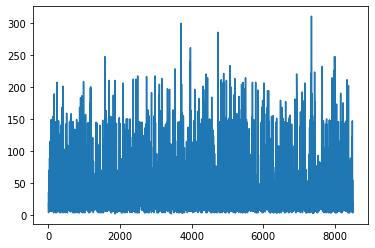

In [27]:
# Word Count Distribution for Description
df4['clean_word_count'].plot(
    x='word_count',
    y='count')

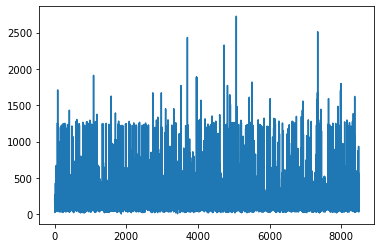

In [28]:
# Description Length Distribution
df4['clean_review_len'].plot(
    x='review length',
    y='count')

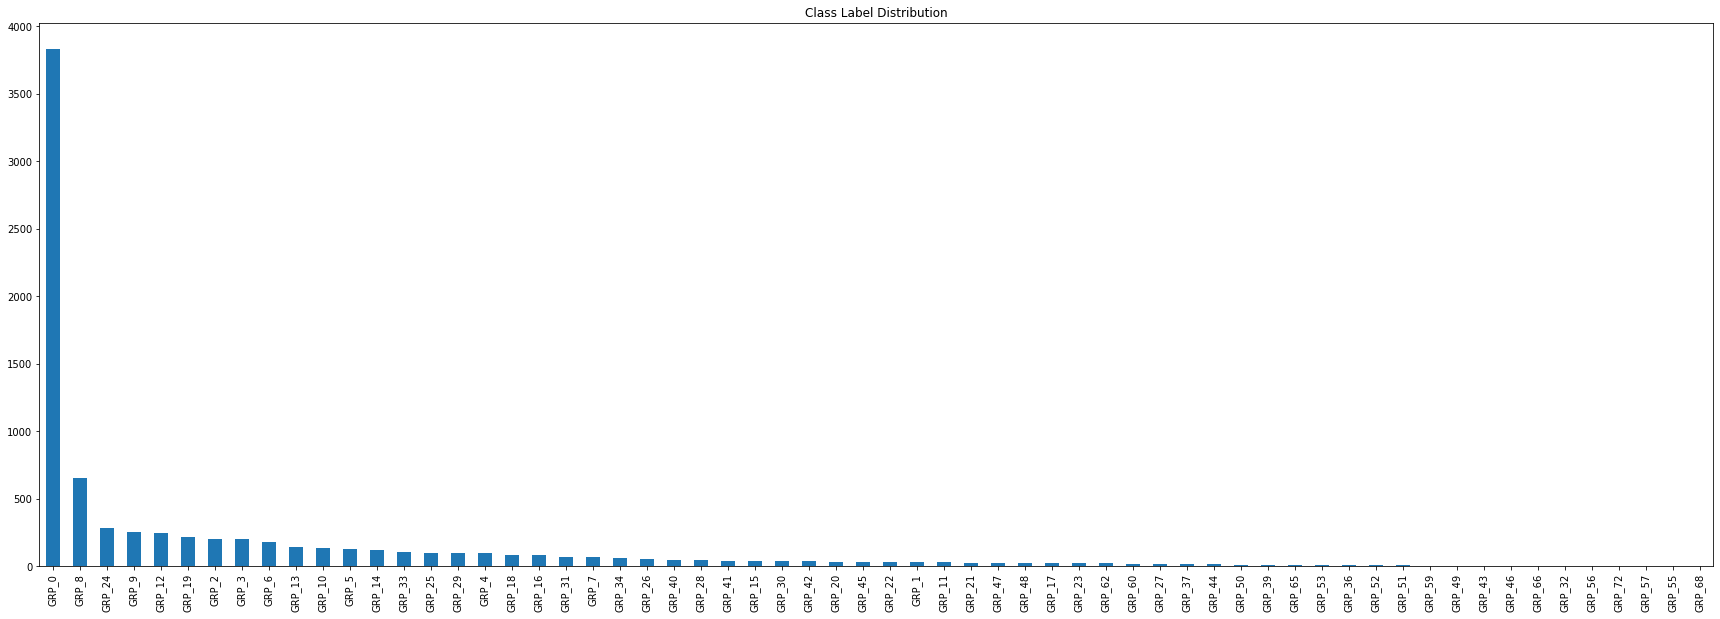

In [29]:
# Assignment group distribution
df4['Assignment group'].value_counts().plot(kind='bar', figsize=(30,10), title='Class Label Distribution')

In [30]:
# The distribution of top unigrams before removing stop words for Complete_Description

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(df4['Complete_Description'], 20)
for word, freq in common_words:
    print(word, freq)

to 8470
the 7096
in 5121
emailaddress 3830
is 3613
from 3521
not 3213
on 2916
and 2754
for 2632
at 2471
no 2410
received 2387
please 2279
2016 2153
00 2007
job 1979
password 1967
job_scheduler 1928
of 1853


In [31]:
# The distribution of top unigrams after removing stop words for Complete_Description

def get_top_n_words(corpus, range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df4['Complete_Description'], (1,1),20)
for word, freq in common_words:
    print(word, freq)

emailaddress 3830
received 2387
2016 2153
00 2007
job 1979
password 1967
job_scheduler 1928
erp 1852
yes 1774
failed 1738
na 1635
unable 1482
company 1461
10 1367
reset 1336
user 1330
issue 1228
access 1210
error 1073
account 1051


In [32]:
# The distribution of top bigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df4['Complete_Description'], (2,2),20)
for word, freq in common_words:
    print(word, freq)

received emailaddress 2239
failed job_scheduler 1614
yes na 1570
00 job 806
emailaddress job 787
password reset 650
job_scheduler 09 623
job_scheduler 10 576
emailaddress hello 444
backup circuit 441
job_scheduler 08 372
erp sid_34 337
job job_scheduler 300
abended job 298
reset password 297
ticket update 295
type outage 286
scheduled maintenance 286
na company 286
power _________ 283


In [33]:
# The distribution of top trigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df4['Complete_Description'], (3,3) ,20)
for word, freq in common_words:
    print(word, freq)

received emailaddress job 786
failed job_scheduler 09 623
failed job_scheduler 10 576
received emailaddress hello 443
failed job_scheduler 08 372
abended job job_scheduler 298
yes na company 285
________ yes na 267
received emailaddress hi 223
emailaddress mailto emailaddress 173
browser microsoft internet 168
microsoft internet explorer 168
emailaddress customer number 168
language browser microsoft 165
internet explorer emailaddress 165
explorer emailaddress customer 165
received emailaddress dear 161
customer number telephone 160
received emailaddress abended 151
emailaddress abended job 151


In [34]:
df4['Assignment group'].value_counts()

GRP_0     3834
GRP_8      657
GRP_24     287
GRP_9      252
GRP_12     245
          ... 
GRP_56       3
GRP_72       2
GRP_57       2
GRP_55       1
GRP_68       1
Name: Assignment group, Length: 62, dtype: int64

In [35]:
df4['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_26',
       'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_33',
       'GRP_25', 'GRP_34', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46',
       'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_56', 'GRP_57', 'GRP_59', 'GRP_60', 'GRP_32',
       'GRP_62', 'GRP_65', 'GRP_66', 'GRP_68', 'GRP_55', 'GRP_72'],
      dtype=object)

In [36]:
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# df4['Assignment group LabelEncode']= label_encoder.fit_transform(df4['Assignment group']) 
  
# df4['Assignment group LabelEncode'].unique() 

In [37]:
df5 = df4.groupby('Assignment group').filter(lambda x: len(x) < 7)

In [38]:
df5.head()

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Summarized_Translated_Short Description,Complete_Description,clean_review_len,clean_word_count
626,"received from: emailaddress gso, currently...",production order number issue,GRP_43,47,4,"received from: emailaddress gso, currently...",47,production order number issue,"received from: emailaddress gso, currently...",346,51
841,"hi team, i need your help with two error the...",error with customization (engineering tool) - ...,GRP_46,39,11,"hi team, i need your help with two error the...",39,error with customization (engineering tool) - ...,"hi team, i need your help with two error the...",328,50
1143,the following word-document can not be edited:...,please redirect to local it: word document 134...,GRP_49,25,9,the following word-document can not be edited:...,25,please redirect to local it: word document 134...,the following word-document can not be edited:...,208,34
1757,"发件人: white, ben emailaddress 发送时间: 2016年10月11日...",please provide ip for our 5 users,GRP_56,83,7,"发件人: white, ben emailaddress 发送时间: 2016年10月11日...",83,please provide ip for our 5 users,"发件人: white, ben emailaddress 发送时间: 2016年10月11日...",544,90
1886,i cannot access the dob report. i was able to...,i cannot access the dob report. i was able to...,GRP_57,21,21,i cannot access the dob report. i was able to...,21,i cannot access the dob report. i was able to...,i cannot access the dob report. i was able to...,222,42


In [39]:
df5.shape

(39, 11)

In [40]:
df4.shape

(8184, 11)

In [41]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)


frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)
######
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [42]:
df4.shape

(8574, 11)

In [43]:
df6 = df4.groupby('Assignment group').filter(lambda x: len(x) < 7)
df6

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Summarized_Translated_Short Description,Complete_Description,clean_review_len,clean_word_count


In [44]:
df4.head()

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Summarized_Translated_Short Description,Complete_Description,clean_review_len,clean_word_count
0,-verified user details.(employee# & manager na...,login issue,GRP_0,33,2,-verified user details.(employee# & manager na...,33,login issue,-verified user details.(employee# & manager na...,214,35
1,"received from: emailaddress hello team, my...",outlook,GRP_0,25,1,"received from: emailaddress hello team, my...",25,outlook,"received from: emailaddress hello team, my...",179,26
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0,11,5,received from: emailaddress hi i cannot lo...,11,cant log in to vpn,received from: emailaddress hi i cannot lo...,83,16
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5,unable to access hr_tool page,5,unable to access hr_tool page,unable to access hr_tool page unable to access...,59,10
4,skype error,skype error,GRP_0,2,2,skype error,2,skype error,skype error skype error,23,4


In [45]:
df7 = df4.drop(['Translated_Description','Translated_Short description','Length of Translated_Description Before Summarization','Length of Translated_Short description Before Summarization','Summarized_Translated_Description','Length of Translated_Description After Summarization','clean_review_len','clean_word_count','Summarized_Translated_Short Description'],axis=1)
df7.head()

,Assignment group,Complete_Description
0,GRP_0,-verified user details.(employee# & manager na...
1,GRP_0,"received from: emailaddress hello team, my..."
2,GRP_0,received from: emailaddress hi i cannot lo...
3,GRP_0,unable to access hr_tool page unable to access...
4,GRP_0,skype error skype error


In [46]:
df7['data'] = df7['Complete_Description']
df7['target'] = df7['Assignment group']
df7.drop(['Assignment group','Complete_Description'],axis=1,inplace=True)
df7 = df7[df7['target'] != 'GRP_0']
df7.head()

,data,target
6,event: critical:HostName_221.company.com the v...,GRP_1
17,"when undocking pc , screen will not come back ...",GRP_3
32,"received from: emailaddress gentles, i hav...",GRP_4
43,received from: emailaddress hi - the print...,GRP_5
47,received from: emailaddress job Job_1424 fail...,GRP_6


In [47]:
df7.shape

(4740, 2)

In [48]:
#RandomOverSampler

upsampler = RandomOverSampler(sampling_strategy='auto',random_state=0)
X,y = upsampler.fit_sample(df7.drop(['target'],axis=1),df7['target'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
df8 = pd.DataFrame(X)
df9 = pd.DataFrame(y)

In [50]:
df10 = pd.concat([df8, df9],axis=1)
df10.columns = ['data','target']
df10.head()

,data,target
0,event: critical:HostName_221.company.com the v...,GRP_1
1,"when undocking pc , screen will not come back ...",GRP_3
2,"received from: emailaddress gentles, i hav...",GRP_4
3,received from: emailaddress hi - the print...,GRP_5
4,received from: emailaddress job Job_1424 fail...,GRP_6


In [51]:
print(df10.shape)
df10.target.value_counts()

(40077, 2)


GRP_6     657
GRP_36    657
GRP_50    657
GRP_52    657
GRP_46    657
         ... 
GRP_3     657
GRP_32    657
GRP_2     657
GRP_34    657
GRP_65    657
Name: target, Length: 61, dtype: int64

In [52]:
df_grp0 = pd.read_csv('/content/drive/My Drive/MyColabProjects/Capstone/NLP2/nlp_project/dataset/Updated_translated_df_Grp_Segregation.csv')
df_grp0.head()

,Short description,Description,Caller,Assignment group,Raked Short description,Raked Description,Iso_Description,Language_Description,Translated_Description,Iso_Short description,Language_Short description,Translated_Short description,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Summarized_Translated_Description,Length of Translated_Description After Summarization,Complete_Description,index
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0_2,['login issue'],"['verified user details', 'user name', 'manage...",en,English,-verified user details.(employee# & manager na...,en,English,login issue,33,2,-verified user details.(employee# & manager na...,33,-verified user details.(employee# & manager na...,0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0_2,['outlook'],"['somebody please advise', 'com hello team', '...",en,English,received from: hmjdrvpb.komuaywn@gmail.com ...,en,English,outlook,25,1,received from: hmjdrvpb.komuaywn@gmail.com ...,25,received from: hmjdrvpb.komuaywn@gmail.com ...,1
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0_2,"['cant log', 'vpn']","['vpn best', 'com hi', 'cannot log', 'ybqkwiam...",en,English,received from: eylqgodm.ybqkwiam@gmail.com ...,en,English,cant log in to vpn,11,5,received from: eylqgodm.ybqkwiam@gmail.com ...,11,received from: eylqgodm.ybqkwiam@gmail.com ...,2
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0_1,"['access hr_tool page', 'unable']","['access hr_tool page', 'unable']",en,English,unable to access hr_tool page,en,English,unable to access hr_tool page,5,5,unable to access hr_tool page,5,unable to access hr_tool page unable to access...,3
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0_2,['skype error'],['skype error'],ja,Japanese,skype error,ja,Japanese,skype error,2,2,skype error,2,skype error skype error,4


In [53]:
df_g0 = df_grp0.drop(['Short description', 'Description', 'Caller', 
       'Raked Short description', 'Raked Description', 'Iso_Description',
       'Language_Description', 'Translated_Description',
       'Iso_Short description', 'Language_Short description',
       'Translated_Short description',
       'Length of Translated_Description Before Summarization',
       'Length of Translated_Short description Before Summarization',
       'Summarized_Translated_Description',
       'Length of Translated_Description After Summarization','index',
       ],axis=1)

In [54]:
df_g0.head()

,Assignment group,Complete_Description
0,GRP_0_2,-verified user details.(employee# & manager na...
1,GRP_0_2,received from: hmjdrvpb.komuaywn@gmail.com ...
2,GRP_0_2,received from: eylqgodm.ybqkwiam@gmail.com ...
3,GRP_0_1,unable to access hr_tool page unable to access...
4,GRP_0_2,skype error skype error


In [55]:
df_g0.shape

(8500, 2)

In [56]:
df11 = df_g0[df_g0['Assignment group'].str.contains("GRP_0_")]

In [57]:
df11.head()

,Assignment group,Complete_Description
0,GRP_0_2,-verified user details.(employee# & manager na...
1,GRP_0_2,received from: hmjdrvpb.komuaywn@gmail.com ...
2,GRP_0_2,received from: eylqgodm.ybqkwiam@gmail.com ...
3,GRP_0_1,unable to access hr_tool page unable to access...
4,GRP_0_2,skype error skype error


In [58]:
df11['data'] = df11['Complete_Description']
df11['target'] = df11['Assignment group']
df11 = df11.drop(['Complete_Description','Assignment group'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
df11.head()

,data,target
0,-verified user details.(employee# & manager na...,GRP_0_2
1,received from: hmjdrvpb.komuaywn@gmail.com ...,GRP_0_2
2,received from: eylqgodm.ybqkwiam@gmail.com ...,GRP_0_2
3,unable to access hr_tool page unable to access...,GRP_0_1
4,skype error skype error,GRP_0_2


In [60]:
df11['target'].value_counts()

GRP_0_2    1274
GRP_0_4     650
GRP_0_1     553
GRP_0_0     494
GRP_0_3     332
GRP_0_7     261
GRP_0_6     211
GRP_0_5     201
Name: target, dtype: int64

In [61]:
df10.shape

(40077, 2)

In [62]:
df11.shape

(3976, 2)

In [63]:
df12 = pd.concat([df10,df11])

In [64]:
df12.shape

(44053, 2)

In [65]:
df12.head()

,data,target
0,event: critical:HostName_221.company.com the v...,GRP_1
1,"when undocking pc , screen will not come back ...",GRP_3
2,"received from: emailaddress gentles, i hav...",GRP_4
3,received from: emailaddress hi - the print...,GRP_5
4,received from: emailaddress job Job_1424 fail...,GRP_6


In [66]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df12['target'] = label_encoder.fit_transform(df12['target']) 
  
df12['target'].unique() 

array([ 8, 30, 39, 50, 59, 65, 67, 68,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 25, 35, 36,
       37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56,
       57, 58, 60, 33, 61, 62, 63, 64, 55, 66,  2,  1,  0,  4,  3,  7,  6,
        5])

In [67]:
y = df12['target']

In [68]:
y.shape

(44053,)

In [69]:
counter = Counter(y)
print(counter)

Counter({2: 1274, 8: 657, 30: 657, 39: 657, 50: 657, 59: 657, 65: 657, 67: 657, 68: 657, 9: 657, 10: 657, 11: 657, 12: 657, 13: 657, 14: 657, 15: 657, 16: 657, 17: 657, 18: 657, 19: 657, 20: 657, 21: 657, 22: 657, 23: 657, 24: 657, 26: 657, 27: 657, 28: 657, 29: 657, 31: 657, 32: 657, 34: 657, 25: 657, 35: 657, 36: 657, 37: 657, 38: 657, 40: 657, 41: 657, 42: 657, 43: 657, 44: 657, 45: 657, 46: 657, 47: 657, 48: 657, 49: 657, 51: 657, 52: 657, 53: 657, 54: 657, 56: 657, 57: 657, 58: 657, 60: 657, 33: 657, 61: 657, 62: 657, 63: 657, 64: 657, 55: 657, 66: 657, 4: 650, 1: 553, 0: 494, 3: 332, 7: 261, 6: 211, 5: 201})


In [70]:
MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df12.data.values)
post_seq = tokenizer.texts_to_sequences(df12.data.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3, random_state=1)

In [72]:
X_train.shape,X_test.shape

((30837, 300), (13216, 300))

In [73]:
y_train.shape, y_test.shape

((30837,), (13216,))

In [74]:
vocab_size = len(tokenizer.word_index) + 1

In [75]:
vocab_size

17477

Deeplearning : RNN
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence.

In [76]:
# inputs = Input(shape=(MAX_LENGTH, ))
# embedding_layer = Embedding(vocab_size,
#                             128,
#                             input_length=MAX_LENGTH)(inputs)

# x = LSTM(64)(embedding_layer)
# x = Dense(32, activation='relu')(x)
# predictions = Dense(num_class, activation='softmax')(x)
# model = Model(inputs=[inputs], outputs=predictions)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['acc'])

# model.summary()
# filepath ="weights.hdf5"
# checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.3, 
#           shuffle=True, epochs=6, callbacks=[checkpointer])

In [77]:
# predicted = model.predict(X_test)
# predicted = np.argmax(predicted, axis=1)
# accuracy_score(y_test, predicted)

In [78]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
num_class = len(np.unique(df12['target'].values))

In [100]:
max_features = vocab_size  
maxlen = 200
seq_output_size = 128
filters = 64
kernel_size = 5
pool_size = 4
activation_func = 'sigmoid'

In [80]:
# Bi directional LSTM
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
model = keras.Model(inputs, outputs)
model.summary()

In [81]:
print(len(X_train), "Training sequences")
print(len(X_test), "Validation sequences")

In [82]:
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.fit(X_train, y_train, batch_size=20, epochs=7, validation_data=(X_test, y_test))

In [83]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

In [107]:
# GRU 
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
# x = layers.Add(Sequential())(inputs)
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1)(x)
x = layers.MaxPooling1D(pool_size=pool_size)(x)
# Add GRU
x = layers.GRU(seq_output_size, dropout=0.2, recurrent_dropout=0.2)(x)
x = layers.Dense(1)(x)
# outputs = layers.Activation('sigmoid')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
gru_model = keras.Model(inputs, outputs)
gru_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, None, 128)         2237056   
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 64)          41024     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               74112     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129 

In [108]:
gru_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
gru_model.fit(X_train, y_train, batch_size=20, epochs=7, validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 30837 samples, validate on 13216 samples
Epoch 1/7
30837/30837 [==============================] - 160s 5ms/step - loss: 3.7682 - acc: 0.0404 - val_loss: 3.4362 - val_acc: 0.0465
Epoch 2/7
30837/30837 [==============================] - 163s 5ms/step - loss: 3.3380 - acc: 0.0658 - val_loss: 3.2529 - val_acc: 0.0656
Epoch 3/7
30837/30837 [==============================] - 161s 5ms/step - loss: 3.1589 - acc: 0.0899 - val_loss: 3.1389 - val_acc: 0.1088
Epoch 4/7
30837/30837 [==============================] - 163s 5ms/step - loss: 3.1033 - acc: 0.1025 - val_loss: 3.0641 - val_acc: 0.0932
Epoch 5/7
30837/30837 [==============================] - 161s 5ms/step - loss: 86.6629 - acc: 0.1107 - val_loss: 3.1609 - val_acc: 0.0982
Epoch 6/7
30837/30837 [==============================] - 161s 5ms/step - loss: 3.0372 - acc: 0.1073 - val_loss: 2.9866 - val_acc: 0.1348
Epoch 7/7
30837/30837 [==============================] - 161s 5ms/step - loss: 2.9408 - acc: 0.1209 - val_loss: 2.9378 - val_ac

In [110]:
predicted = gru_model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.13960351089588377